# CUSTOMER SEGMENTATION USING RFM ANALYSIS

IMPORTING THE LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

READING AND LOADING THE DATASET

In [2]:
cust_data = pd.read_csv("/Users/rajalakshmishanmuganathan/Downloads/customer_segmentation 2.csv")

In [3]:
cust_data.sample(3)

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
204524,204524,554669,23233,WRAP POPPIES DESIGN,25,5/25/2011 15:31,0.42,15203.0,United Kingdom
498623,498623,578531,21506,"FANCY FONT BIRTHDAY CARD,",12,11/24/2011 14:40,0.42,17364.0,United Kingdom
56366,56366,541104,85039A,SET/4 RED MINI ROSE CANDLE IN BOWL,8,1/13/2011 14:29,1.63,NaN,United Kingdom


In [4]:
cust_data.isna().sum()

index               0
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

DATA CLEANING

In [5]:
row, col = cust_data.shape
total_cells = row * col
missing_cells = cust_data.isna().sum()
missing_data = missing_cells.sum()
total_missing_percentage = ( missing_data / total_cells ) * 100
print (f'The percentage of missing data is: {total_missing_percentage}')

The percentage of missing data is: 2.7994450072695685


In [6]:
print (f'The dataset has {row} rows and {col} columns')

The dataset has 541909 rows and 9 columns


In [7]:
missing_values = cust_data.isnull().sum(axis=1)
for n in missing_values.value_counts().sort_index().index:
    if n > 0:
        print(f"For the rows with exactly {n} missing values, NaN values are found in:")
        n_miss_per_col = cust_data[missing_values == n].isnull().sum()
        print(n_miss_per_col[n_miss_per_col > 0])
        print('\n\n')

For the rows with exactly 1 missing values, NaN values are found in:
CustomerID    133626
dtype: int64



For the rows with exactly 2 missing values, NaN values are found in:
Description    1454
CustomerID     1454
dtype: int64





In [8]:
cust_data.dropna(axis = 0,inplace=True)

In [9]:
cust_data.shape

(406829, 9)

DATA FORMATTING

In [10]:
cust_data.dtypes

index            int64
InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [11]:
cust_data['InvoiceNo'] = cust_data['InvoiceNo'].astype('string')
cust_data['StockCode'] = cust_data['StockCode'].astype('string')
cust_data['Description'] = cust_data['Description'].astype('string')
cust_data['InvoiceDate'] = pd.to_datetime(cust_data['InvoiceDate'])

ADDING NEW COLUMN 'TotalAmount'

In [12]:
cust_data['TotalAmount'] = cust_data['Quantity'] * cust_data['UnitPrice']

In [13]:
cust_data['Description'].value_counts()

Description
WHITE HANGING HEART T-LIGHT HOLDER     2070
REGENCY CAKESTAND 3 TIER               1905
JUMBO BAG RED RETROSPOT                1662
ASSORTED COLOUR BIRD ORNAMENT          1418
PARTY BUNTING                          1416
                                       ... 
NEW BAROQUE B'FLY NECKLACE CRYSTAL        1
GLASS AND PAINTED BEADS BRACELET OL       1
GLASS AND BEADS BRACELET IVORY            1
CROCHET LILAC/RED BEAR KEYRING            1
PINK BAROQUE FLOCK CANDLE HOLDER          1
Name: count, Length: 3896, dtype: Int64

FINDING THE LATEST INVOICE DATE

In [14]:
latest_invoice_date = cust_data['InvoiceDate'].max()

print(f"The latest invoice date is: {latest_invoice_date}")

The latest invoice date is: 2011-12-09 12:50:00


In [15]:
from datetime import date as dt
today = pd.Timestamp('2012-01-01')
print(f"Date : {today}")

Date : 2012-01-01 00:00:00


CALCULATE THE RFM VALUES

In [16]:
rfm_values = cust_data.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (today - x.max()).days,
    'CustomerID': 'count',
    'TotalAmount': 'sum'
}).rename(columns={'InvoiceDate': 'Recency', 'CustomerID': 'Frequency', 'TotalAmount': 'Monetary'})

In [17]:
print(rfm_values)
rfm_values.reset_index(inplace=True)

            Recency  Frequency  Monetary
CustomerID                              
12346.0         347          2      0.00
12347.0          24        182   4310.00
12348.0          97         31   1797.24
12349.0          40         73   1757.55
12350.0         332         17    334.40
...             ...        ...       ...
18280.0         299         10    180.60
18281.0         202          7     80.82
18282.0          29         13    176.60
18283.0          25        756   2094.88
18287.0          64         70   1837.28

[4372 rows x 3 columns]


In [18]:
rfm_values['R Score'] = pd.qcut (rfm_values['Recency'],4, labels = [ 1, 2, 3, 4]).astype(pd.Int64Dtype()).fillna(0).astype(int)
rfm_values['F Score'] = pd.qcut (rfm_values['Frequency'].rank(method= "first"), 4, labels = [1, 2, 3, 4]).astype(pd.Int64Dtype()).fillna(0).astype(int)
rfm_values['M Score'] = pd.qcut (rfm_values['Monetary'] , 4, labels = [1, 2, 3, 4]).astype(pd.Int64Dtype()).fillna(0).astype(int)

In [19]:
rfm_values['RFM_Segment'] = rfm_values['R Score'].astype("string") + rfm_values['F Score'].astype("string") + rfm_values['M Score'].astype("string")
rfm_values['RFM Score'] = rfm_values[['R Score', 'F Score', 'M Score']].sum(axis=1)

In [20]:
print(rfm_values)

      CustomerID  Recency  Frequency  Monetary  R Score  F Score  M Score  \
0        12346.0      347          2      0.00        4        1        1   
1        12347.0       24        182   4310.00        1        4        4   
2        12348.0       97         31   1797.24        3        2        4   
3        12349.0       40         73   1757.55        2        3        4   
4        12350.0      332         17    334.40        4        1        2   
...          ...      ...        ...       ...      ...      ...      ...   
4367     18280.0      299         10    180.60        4        1        1   
4368     18281.0      202          7     80.82        4        1        1   
4369     18282.0       29         13    176.60        1        1        1   
4370     18283.0       25        756   2094.88        1        4        4   
4371     18287.0       64         70   1837.28        2        3        4   

     RFM_Segment  RFM Score  
0            411          6  
1            14

SEGMENT DISTRIBUTION

In [21]:
def rfm_classification(row):
    if row['RFM Score'] >= 9:
        return "Best Customers"
    elif row['RFM Score'] >= 6:
        return "Loyalists"
    elif row['RFM Score'] >= 3:
        return "Potential Loyalists"
    else:
        return "At Risk!"
    
rfm_values['Customer_Segment'] = rfm_values.apply(rfm_classification, axis=1)

In [22]:
segment_counts = rfm_values['Customer_Segment'].value_counts()
print(segment_counts)

segment_summary = rfm_values.groupby('Customer_Segment').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean'
}).reset_index()
print(segment_summary)


Customer_Segment
Loyalists              2313
Best Customers         1451
Potential Loyalists     608
Name: count, dtype: int64
      Customer_Segment     Recency   Frequency     Monetary
0       Best Customers   87.536871  208.922123  4479.107079
1            Loyalists  143.469520   40.876783   716.188748
2  Potential Loyalists   62.032895   15.024671   237.396168


NUMERICAL COUNT AND PERCENTAGE COUNT OF EACH SEGMENT

In [23]:
score_percentages = rfm_values['Customer_Segment'].value_counts(normalize=True) * 100
print(score_percentages)

Customer_Segment
Loyalists              52.904849
Best Customers         33.188472
Potential Loyalists    13.906679
Name: proportion, dtype: float64


In [24]:
rfm_values['Customer_Segment'].value_counts()

Customer_Segment
Loyalists              2313
Best Customers         1451
Potential Loyalists     608
Name: count, dtype: int64

SEGMENT WISE SUMMARY

In [25]:
segment_summary

,Customer_Segment,Recency,Frequency,Monetary
0,Best Customers,87.536871,208.922123,4479.107079
1,Loyalists,143.469520,40.876783,716.188748
2,Potential Loyalists,62.032895,15.024671,237.396168


In [26]:
# Calculate mean R, F, M values for each segment
rfm_agg = segment_summary.groupby('Customer_Segment').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean'
}).reset_index()

# Identify the segment with the highest mean Recency, Frequency, and Monetary values
highest_recency_segment = rfm_agg.loc[rfm_agg['Recency'].idxmax()]['Customer_Segment']
highest_frequency_segment = rfm_agg.loc[rfm_agg['Frequency'].idxmax()]['Customer_Segment']
highest_monetary_segment = rfm_agg.loc[rfm_agg['Monetary'].idxmax()]['Customer_Segment']

print("Segment with highest Recency:", highest_recency_segment)
print("Segment with highest Frequency:", highest_frequency_segment)
print("Segment with highest Monetary:", highest_monetary_segment)


Segment with highest Recency: Loyalists
Segment with highest Frequency: Best Customers
Segment with highest Monetary: Best Customers


In [27]:
rfm_values

,CustomerID,Recency,Frequency,Monetary,R Score,F Score,M Score,RFM_Segment,RFM Score,Customer_Segment
0,12346.0,347,2,0.00,4,1,1,411,6,Loyalists
1,12347.0,24,182,4310.00,1,4,4,144,9,Best Customers
2,12348.0,97,31,1797.24,3,2,4,324,9,Best Customers
3,12349.0,40,73,1757.55,2,3,4,234,9,Best Customers
4,12350.0,332,17,334.40,4,1,2,412,7,Loyalists
...,...,...,...,...,...,...,...,...,...,...
4367,18280.0,299,10,180.60,4,1,1,411,6,Loyalists
4368,18281.0,202,7,80.82,4,1,1,411,6,Loyalists
4369,18282.0,29,13,176.60,1,1,1,111,3,Potential Loyalists
4370,18283.0,25,756,2094.88,1,4,4,144,9,Best Customers


IDENTIFYING THE SEGMENT WITH THE HIGHEST VALUES OF RECENCY, FREQUENCY AND MONETARY

In [28]:
# Calculate mean R, F, M values for each segment
rfm_agg = rfm_values.groupby('Customer_Segment').agg({
    'R Score': 'mean',
    'F Score': 'mean',
    'M Score': 'mean',
    'Monetary':'mean',
    'Frequency': 'mean',
    'Recency':'mean'
}).reset_index()

# Identify the segment with the highest mean Recency, Frequency, and Monetary values
highest_recency_segment = rfm_agg.loc[rfm_agg['R Score'].idxmax()]['Customer_Segment']
highest_frequency_segment = rfm_agg.loc[rfm_agg['F Score'].idxmax()]['Customer_Segment']
highest_monetary_segment = rfm_agg.loc[rfm_agg['M Score'].idxmax()]['Customer_Segment']
highest_monetaryvalue_segment = rfm_agg.loc[rfm_agg['Monetary'].idxmax()]['Customer_Segment']


print("Segment with highest Recency:", highest_recency_segment)
print("Segment with highest Frequency:", highest_frequency_segment)
print("Segment with highest Monetary:", highest_monetary_segment)
print("Segment with highest Monetary value:", highest_monetaryvalue_segment)


Segment with highest Recency: Loyalists
Segment with highest Frequency: Best Customers
Segment with highest Monetary: Best Customers
Segment with highest Monetary value: Best Customers


In [29]:
rfm_agg

,Customer_Segment,R Score,F Score,M Score,Monetary,Frequency,Recency
0,Best Customers,2.261888,3.623019,3.613370,4479.107079,208.922123,87.536871
1,Loyalists,2.771725,2.109814,2.129702,716.188748,40.876783,143.469520
2,Potential Loyalists,1.955592,1.304276,1.251645,237.396168,15.024671,62.032895


AVERAGE REVENUE AND CLV VALUE CALCULATION

In [30]:
# Define a gross margin rate (for example, 0.50 means 50%)
gross_margin_rate = 0.50

# Estimate the average customer lifespan (assume it is 1 year here)
average_customer_lifespan = 1

# Calculate the average revenue per customer for each segment
rfm_agg['Avg_Revenue'] = rfm_agg['Monetary'] / rfm_agg['Frequency']

# Calculate the CLV for each segment
rfm_agg['CLV'] = rfm_agg['Avg_Revenue'] * gross_margin_rate * average_customer_lifespan

# Print the CLV for each segment
print(rfm_agg[['Customer_Segment', 'CLV']])


      Customer_Segment        CLV
0       Best Customers  10.719561
1            Loyalists   8.760336
2  Potential Loyalists   7.900212


In [31]:
rfm_agg

,Customer_Segment,R Score,F Score,M Score,Monetary,Frequency,Recency,Avg_Revenue,CLV
0,Best Customers,2.261888,3.623019,3.613370,4479.107079,208.922123,87.536871,21.439123,10.719561
1,Loyalists,2.771725,2.109814,2.129702,716.188748,40.876783,143.469520,17.520673,8.760336
2,Potential Loyalists,1.955592,1.304276,1.251645,237.396168,15.024671,62.032895,15.800424,7.900212


FINDING THE TOP 5 PRODUCTS IN EACH SEGMENT

In [32]:
# Merge the original dataset with the RFM segments
cust_data = cust_data.merge(rfm_values, on='CustomerID', how='left',suffixes=('', '_y'))

# Group by RFM_Segment and StockCode, then aggregate the quantity or total amount
segment_product_agg = cust_data.groupby(['Customer_Segment', 'Description']).agg({
    'Quantity': 'sum',
    'TotalAmount': 'sum'
}).reset_index()

# Find the top products for each segment based on quantity or total amount
top_products_by_segment = segment_product_agg.sort_values(['Customer_Segment', 'TotalAmount'], ascending=[True, False])

# Print the top products for each segment
print(top_products_by_segment)

         Customer_Segment                          Description  Quantity  \
2710       Best Customers             REGENCY CAKESTAND 3 TIER      9221   
3631       Best Customers   WHITE HANGING HEART T-LIGHT HOLDER     27574   
1724       Best Customers              JUMBO BAG RED RETROSPOT     38063   
2294       Best Customers                        PARTY BUNTING     11617   
2556       Best Customers                              POSTAGE      2284   
...                   ...                                  ...       ...   
8059  Potential Loyalists    GLASS STAR FROSTED T-LIGHT HOLDER        -3   
9047  Potential Loyalists  SILVER CHRISTMAS TREE BAUBLE STAND         -1   
9185  Potential Loyalists          SWEETHEART CARRY-ALL BASKET        -2   
8807  Potential Loyalists             REGENCY TEA PLATE ROSES        -20   
8457  Potential Loyalists                               Manual      -595   

      TotalAmount  
2710    106040.40  
3631     75842.30  
1724     69880.21  
2294   

In [33]:
top_products_by_segment

,Customer_Segment,Description,Quantity,TotalAmount
2710,Best Customers,REGENCY CAKESTAND 3 TIER,9221,106040.40
3631,Best Customers,WHITE HANGING HEART T-LIGHT HOLDER,27574,75842.30
1724,Best Customers,JUMBO BAG RED RETROSPOT,38063,69880.21
2294,Best Customers,PARTY BUNTING,11617,52236.63
2556,Best Customers,POSTAGE,2284,48932.74
...,...,...,...,...
8059,Potential Loyalists,GLASS STAR FROSTED T-LIGHT HOLDER,-3,-14.85
9047,Potential Loyalists,SILVER CHRISTMAS TREE BAUBLE STAND,-1,-16.95
9185,Potential Loyalists,SWEETHEART CARRY-ALL BASKET,-2,-17.00
8807,Potential Loyalists,REGENCY TEA PLATE ROSES,-20,-29.00


In [34]:
best_cust = top_products_by_segment['Customer_Segment'] == "Best Customers"

In [35]:
df = top_products_by_segment[best_cust]

In [36]:
df.head(5)

,Customer_Segment,Description,Quantity,TotalAmount
2710,Best Customers,REGENCY CAKESTAND 3 TIER,9221,106040.40
3631,Best Customers,WHITE HANGING HEART T-LIGHT HOLDER,27574,75842.30
1724,Best Customers,JUMBO BAG RED RETROSPOT,38063,69880.21
2294,Best Customers,PARTY BUNTING,11617,52236.63
2556,Best Customers,POSTAGE,2284,48932.74


In [37]:
loyal_cust = top_products_by_segment['Customer_Segment'] == "Loyalists"

In [38]:
df2 = top_products_by_segment[loyal_cust]

In [39]:
df2.head(5)

,Customer_Segment,Description,Quantity,TotalAmount
5960,Loyalists,PICNIC BASKET WICKER 60 PIECES,61,39619.50
6281,Loyalists,REGENCY CAKESTAND 3 TIER,2210,25335.40
7144,Loyalists,WHITE HANGING HEART T-LIGHT HOLDER,6137,16772.15
6144,Loyalists,POSTAGE,668,16520.04
4467,Loyalists,CHILLI LIGHTS,3312,15528.80


In [40]:
pot_loyal_cust = top_products_by_segment['Customer_Segment'] == "Potential Loyalists"

In [41]:
df3 = top_products_by_segment[pot_loyal_cust]

In [42]:
df3.head(5)

,Customer_Segment,Description,Quantity,TotalAmount
7414,Potential Loyalists,ASSORTED COLOUR BIRD ORNAMENT,1056,1707.84
8800,Potential Loyalists,REGENCY CAKESTAND 3 TIER,124,1494.60
8559,Potential Loyalists,PAPER CHAIN KIT 50'S CHRISTMAS,521,1408.95
8706,Potential Loyalists,POSTAGE,50,1257.46
8719,Potential Loyalists,RABBIT NIGHT LIGHT,654,1221.12


PLOTTING AND VISUALISATION

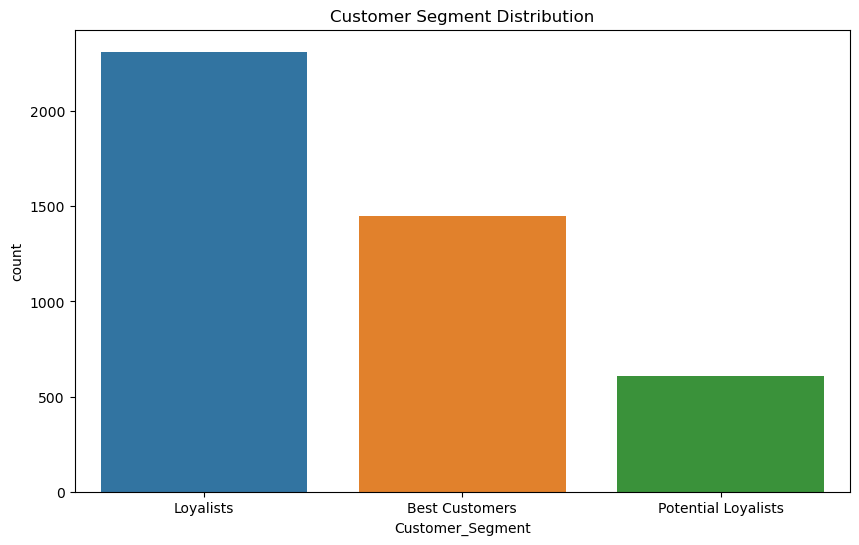

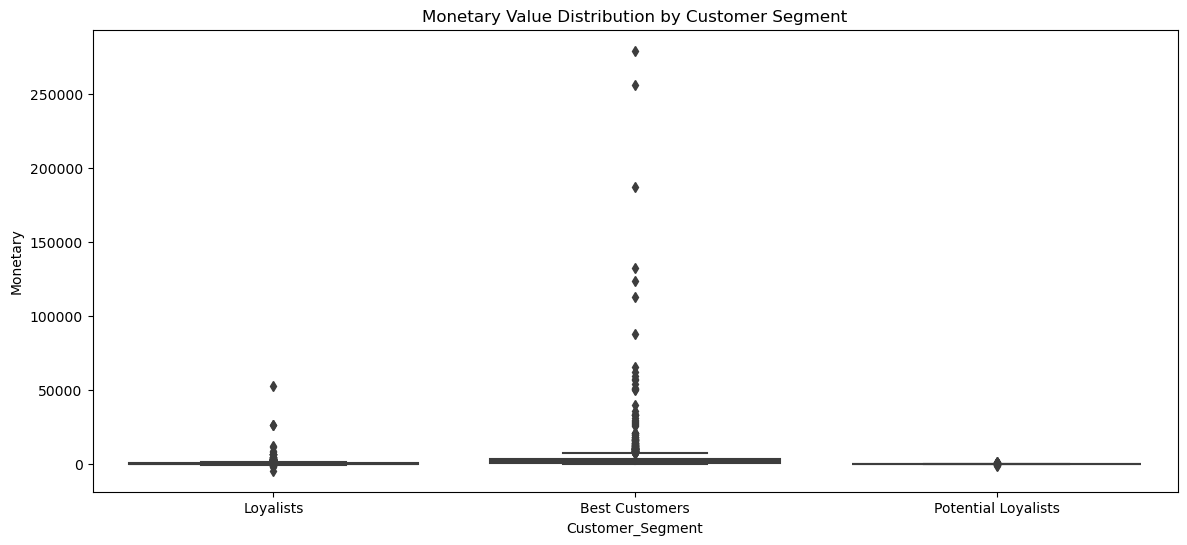

In [43]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Customer_Segment', data=rfm_values, order=rfm_values['Customer_Segment'].value_counts().index)
plt.title('Customer Segment Distribution')
plt.show()

plt.figure(figsize=(14, 6))
sns.boxplot(x='Customer_Segment', y='Monetary', data=rfm_values)
plt.title('Monetary Value Distribution by Customer Segment')
plt.show()


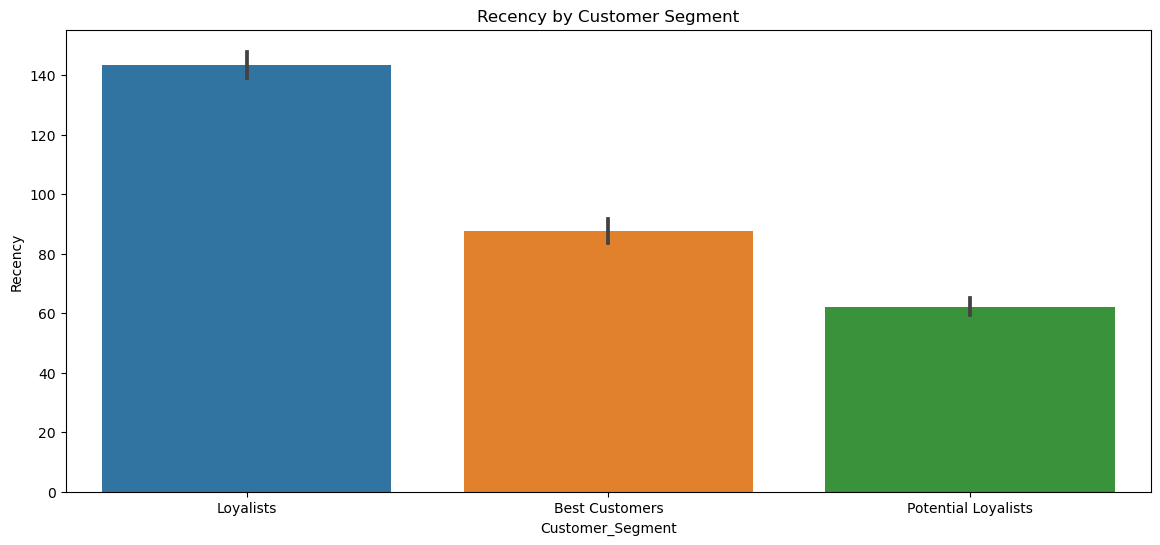

In [44]:
plt.figure(figsize=(14, 6))
sns.barplot(x='Customer_Segment', y='Recency', data=rfm_values)
plt.title('Recency by Customer Segment')
plt.show()

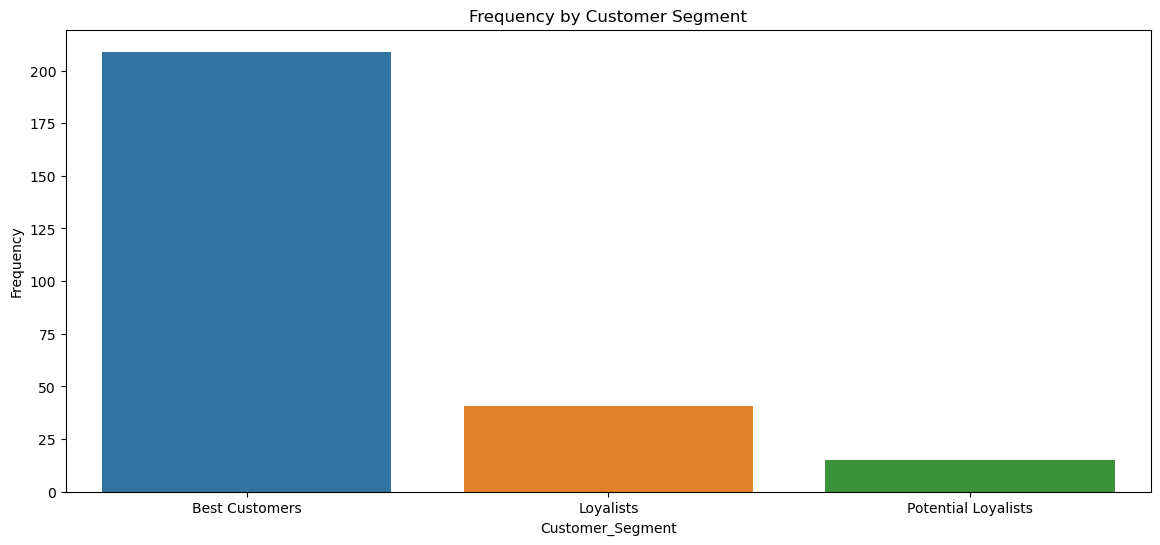

In [45]:
plt.figure(figsize=(14, 6))
sns.barplot(x='Customer_Segment', y='Frequency', data=rfm_agg)
plt.title('Frequency by Customer Segment')
plt.show()

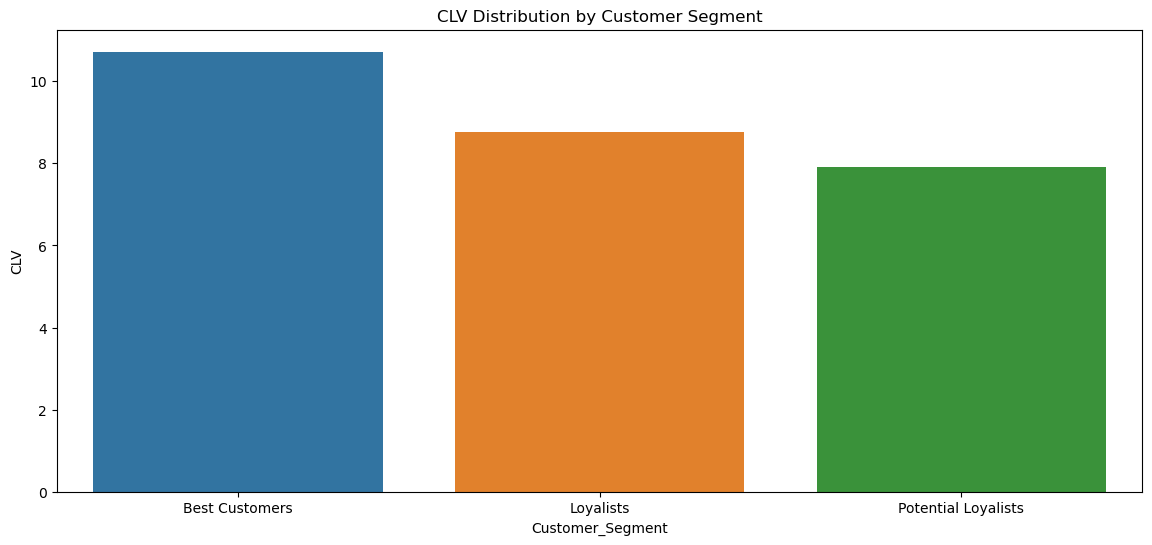

In [46]:
plt.figure(figsize=(14, 6))
sns.barplot(x='Customer_Segment', y='CLV', data=rfm_agg)
plt.title('CLV Distribution by Customer Segment')
plt.show()

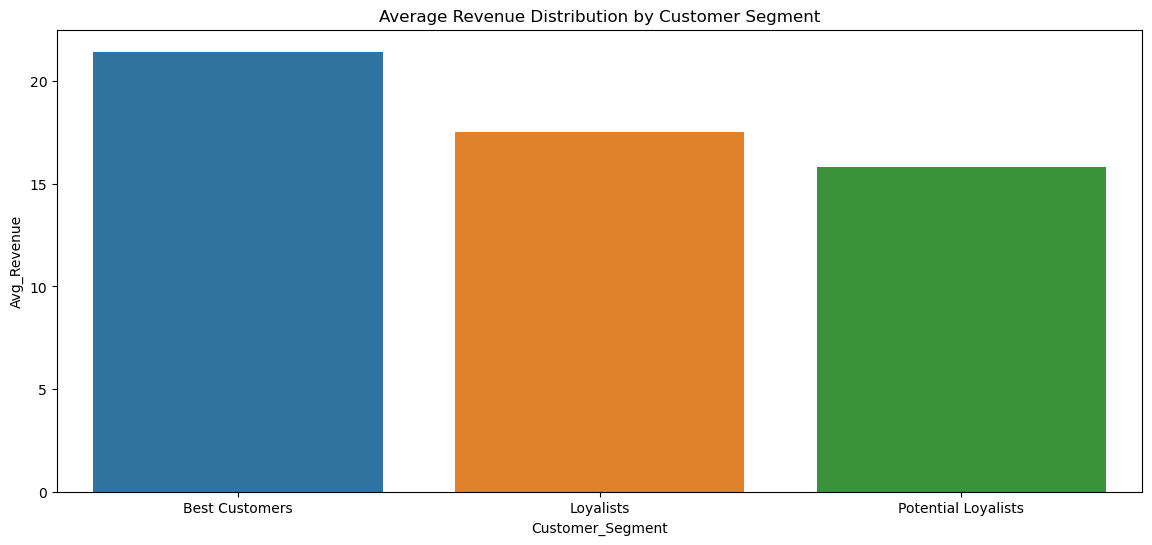

In [47]:
plt.figure(figsize=(14, 6))
sns.barplot(x='Customer_Segment', y='Avg_Revenue', data=rfm_agg)
plt.title('Average Revenue Distribution by Customer Segment')
plt.show()

In [48]:
dfgr = df.groupby('Customer_Segment').head(5)
dfgr2 = df2.groupby('Customer_Segment').head(5)
dfgr3 = df3.groupby('Customer_Segment').head(5)

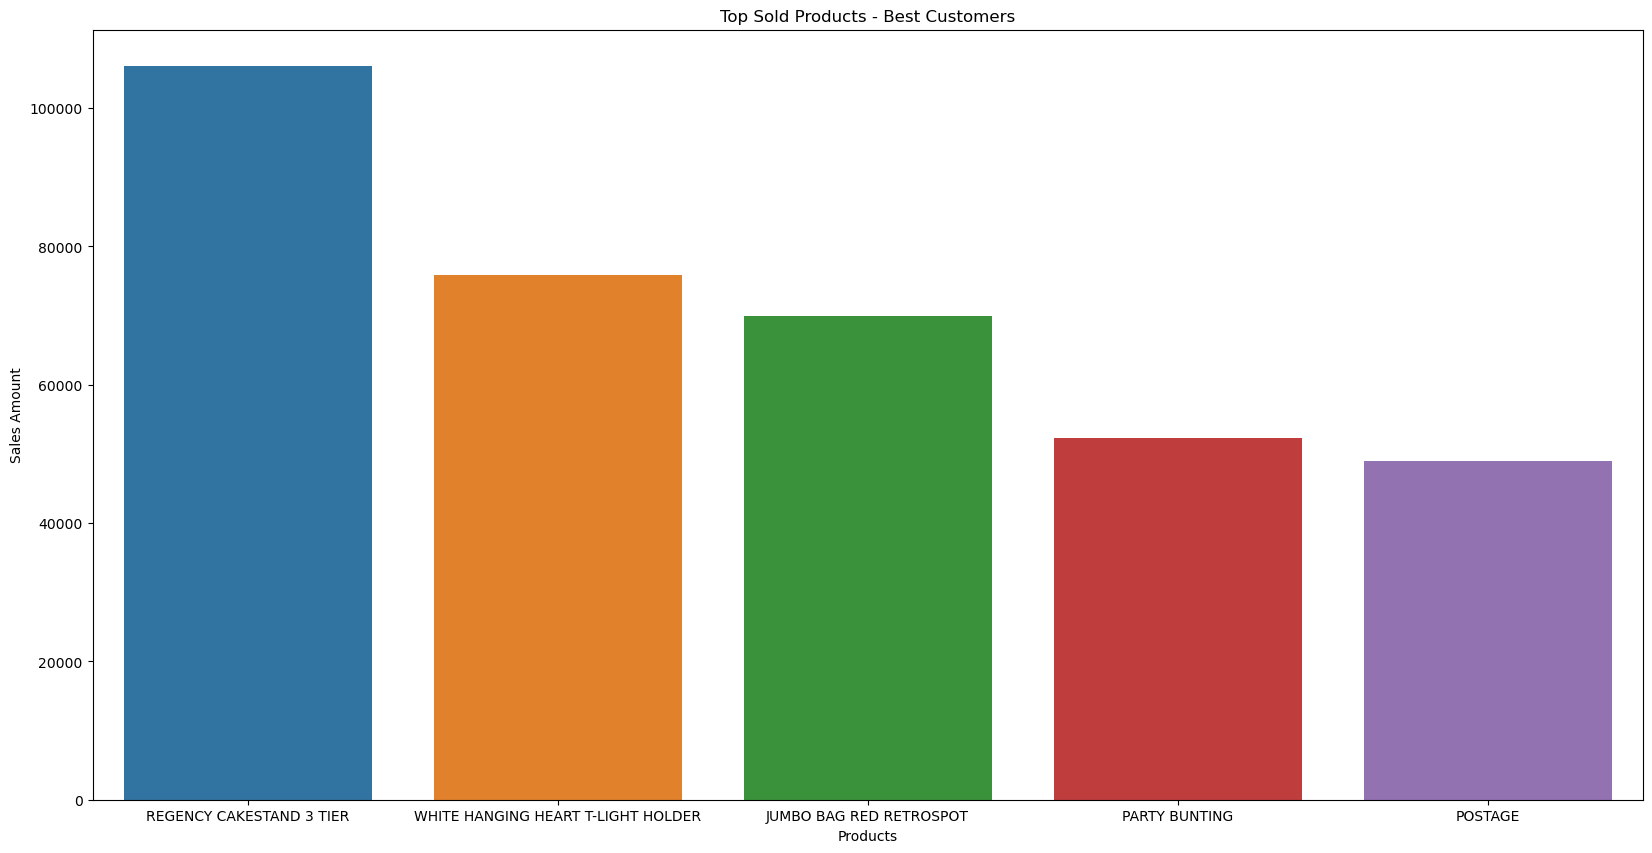

In [49]:
plt.figure(figsize=(20, 10))
sns.barplot(x='Description',y='TotalAmount', data=dfgr)
plt.title('Top Sold Products - Best Customers')
plt.xlabel('Products')
plt.ylabel('Sales Amount')
plt.show()

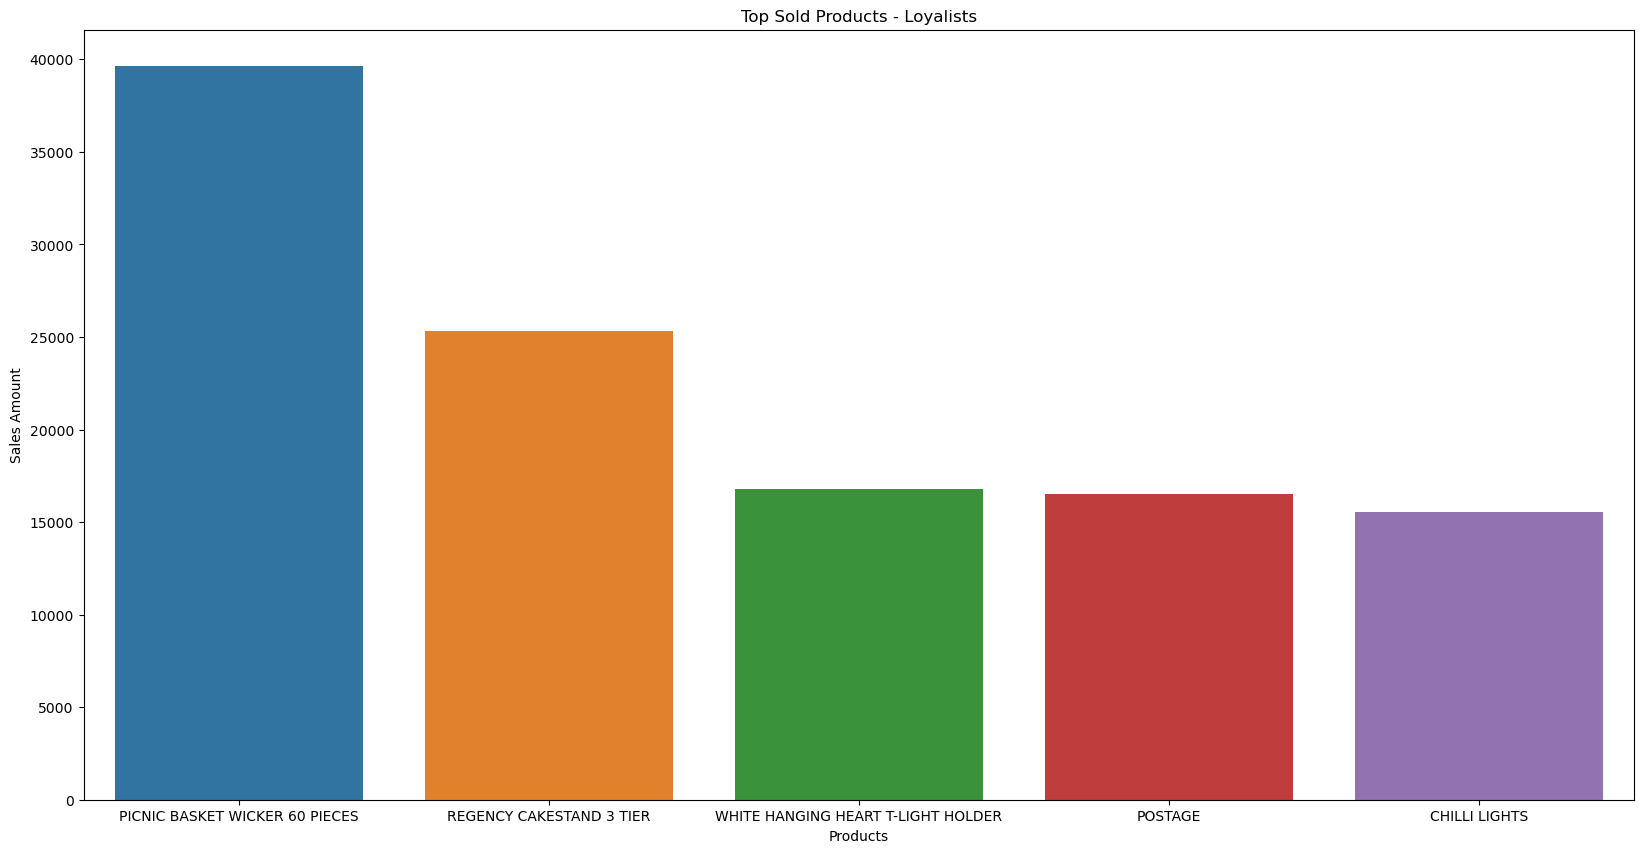

In [50]:
plt.figure(figsize=(20, 10))
sns.barplot(x='Description', y = "TotalAmount", data=dfgr2)
plt.title('Top Sold Products - Loyalists')
plt.xlabel('Products')
plt.ylabel('Sales Amount')
plt.show()

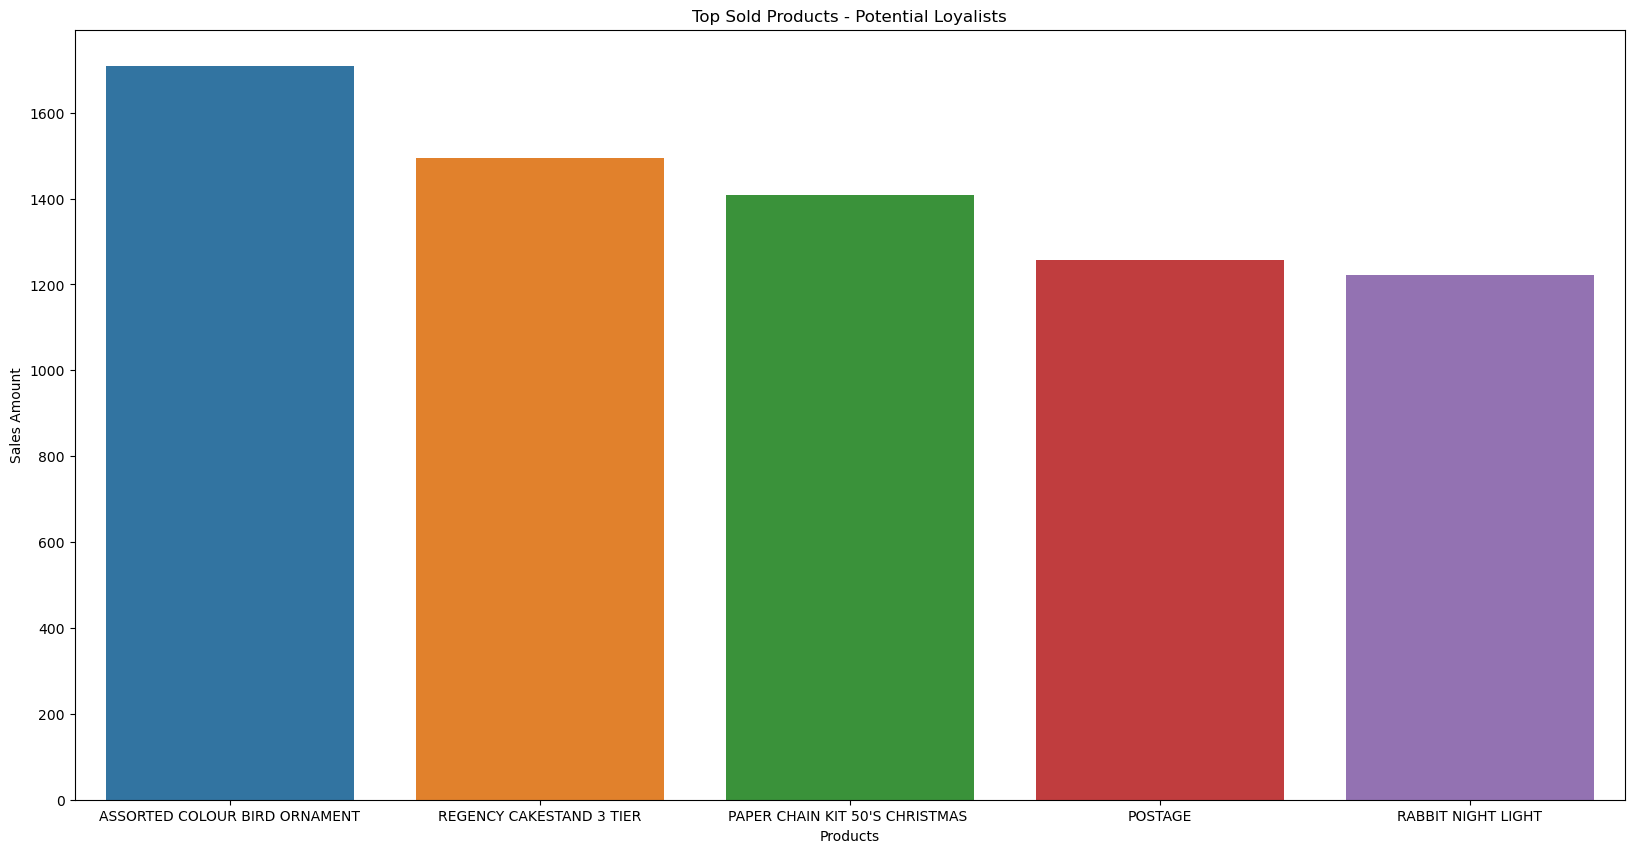

In [51]:
plt.figure(figsize=(20, 10))
sns.barplot(x='Description', y = "TotalAmount", data=dfgr3)
plt.title('Top Sold Products - Potential Loyalists')
plt.xlabel('Products')
plt.ylabel('Sales Amount')
plt.show()